In [174]:
from datetime import datetime
import requests
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [219]:
# Connecting to finviz.com to scrape the data on Stock News
#base URL
finviz_url = 'https://finviz.com/quote.ashx?t='
#List of stocks to be analyzed
tickers = ['AMZN', 'GOOG', 'AAPL',  'JPM']

In [220]:
#Pulling the data 
news_tables = {}
for ticker in tickers:
    #creating the URL for the request
    url = finviz_url + ticker
    #request
    response = requests.get(url=url, headers={'user-agent': 'my_app'})
    #parsing using BeautifulSoup
    html = BeautifulSoup(response.text, 'html')
    #looking for 'news-table' (the table on the webpage containing the news)
    #store the table with the news in the variable news_table
    news_table = html.find(id='news-table')
    #adds a key(stock ticker) and a value (the news table) to the news_table dictionary
    news_tables[ticker] = news_table
   
#Find the news title in every table row    
parsed_data = []

for ticker, news_table in news_tables.items():
      #find all the <tr> - table row containing the news title
      for row in news_table.findAll('tr'):
                       
             #Find <a> tag (containing title of the article)  and extract the title        
             title = row.find('a')
             if title:
               title = title.text 
             #if there is no title print "No article found"  
             else:
                print("No article link found.")
             #Extract the date and time from the <td> tag
             date_data=[]
             date_data =row.find('td').get_text(strip=True).split(' ')
            
                                    
             if len(date_data) == 1:
                time = date_data[0]
             else:
                if date_data[0] == 'Today': 
                    date = datetime.now().date()
                    time = date_data[1]
                else:
                    date = date_data[0]
                    time = date_data[1]
             #Add the ticker, title, date, and time to the the parsed_data list
             parsed_data.append([ticker, date, time, title])
print (parsed_data)
print(len(parsed_data))
      

No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
No article link found.
[['AMZN', datetime.date(2024, 10, 15), '04:38PM', 'Amazon launches AI tools, new capabilities for advertisers'], ['AMZN', datetime.date(2024, 10, 15), '02:47PM', 'Jim Cramer Says Its Just a Matter of Time Before Amazon.com (NASDAQ:AMZN) Rebounds'], ['AMZN', datetime.date(2024, 10, 15), '02:45PM', 'Amazon ramps up AI chip race'], ['AMZN', datetime.date(2024, 10, 15), '01:47PM', 'Amazon Partners with Databricks in Five-Year Deal to Enhance AI Models'], ['AMZN', datetime.date(2024, 10, 15), '01:45PM', 'Final Trades: Amazon, Apollo Global and the IYR'], ['AMZN', datetime.date(2024, 10, 15), '12:45PM', None], ['AMZN', datetime.date(2024, 10, 15), '12:45PM', 'Amazon strikes AI chip deal with Databricks as it looks to nar

In [221]:
#Creating a dataframe from the parsed_data list
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
#CLEANING THE DATA *************************************************** 
#1. Deleting the rows that don't contain a title
df = df.dropna(subset=['title'])
#Normalizing the date format
df['date'] = pd.to_datetime(df['date']).dt.date
#create a file with the data to inspect it
df.to_csv('parsed_data.csv')
df.head(10)



,ticker,date,time,title
0,AMZN,2024-10-15,04:38PM,"Amazon launches AI tools, new capabilities for..."
1,AMZN,2024-10-15,02:47PM,Jim Cramer Says Its Just a Matter of Time Befo...
2,AMZN,2024-10-15,02:45PM,Amazon ramps up AI chip race
3,AMZN,2024-10-15,01:47PM,Amazon Partners with Databricks in Five-Year D...
4,AMZN,2024-10-15,01:45PM,"Final Trades: Amazon, Apollo Global and the IYR"
6,AMZN,2024-10-15,12:45PM,Amazon strikes AI chip deal with Databricks as...
7,AMZN,2024-10-15,12:17PM,Truth Social Stock Jumps as Election Predictio...
8,AMZN,2024-10-15,12:00PM,Amazon unboxes advertiser capabilities spannin...
9,AMZN,2024-10-15,11:57AM,Google Redesigns Shopping Page With Infinite S...
10,AMZN,2024-10-15,11:29AM,"Google Unveils Redesigned, AI-Powered U.S. Sho..."


In [222]:
#run the sentiment analysis on the titles 
vader = SentimentIntensityAnalyzer()
f = lambda title: vader.polarity_scores(title)['compound'] if title is not None else None
df['score'] = df['title'].apply(f)
df.to_csv('scores.csv')
df.head(10)




,ticker,date,time,title,score
0,AMZN,2024-10-15,04:38PM,"Amazon launches AI tools, new capabilities for...",0.1779
1,AMZN,2024-10-15,02:47PM,Jim Cramer Says Its Just a Matter of Time Befo...,0.0258
2,AMZN,2024-10-15,02:45PM,Amazon ramps up AI chip race,0.1779
3,AMZN,2024-10-15,01:47PM,Amazon Partners with Databricks in Five-Year D...,0.1779
4,AMZN,2024-10-15,01:45PM,"Final Trades: Amazon, Apollo Global and the IYR",0.1779
6,AMZN,2024-10-15,12:45PM,Amazon strikes AI chip deal with Databricks as...,-0.2023
7,AMZN,2024-10-15,12:17PM,Truth Social Stock Jumps as Election Predictio...,0.3182
8,AMZN,2024-10-15,12:00PM,Amazon unboxes advertiser capabilities spannin...,0.1779
9,AMZN,2024-10-15,11:57AM,Google Redesigns Shopping Page With Infinite S...,0.0000
10,AMZN,2024-10-15,11:29AM,"Google Unveils Redesigned, AI-Powered U.S. Sho...",0.0000


In [224]:

#plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean('score')
mean_df = mean_df.unstack()

mean_df = mean_df.xs('score', axis='columns').transpose()
#mean_df.groupby('date')['score'].mean().unstack()
today = datetime.now().date()
scores_file_name = 'scores_' + str(today)
mean_df.to_csv(scores_file_name +'.csv')
mean_df.head(100)

ticker,AAPL,AMZN,GOOG,JPM
date,,,,
2024-10-09,NaN,NaN,NaN,0.174825
2024-10-10,0.026627,0.224065,0.145562,0.217075
2024-10-11,0.158417,0.285694,0.041295,0.114065
2024-10-12,0.190333,0.091564,0.188673,0.094700
2024-10-13,0.190025,0.252220,0.367775,NaN
2024-10-14,0.203427,0.353969,0.158183,0.226392
2024-10-15,0.163126,0.114288,0.082525,0.124570


<Figure size 10000x5000 with 0 Axes>

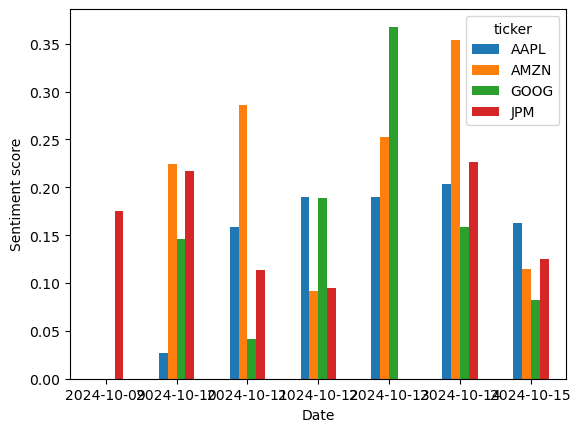

'\ndf[\'date_time\'] = pd.to_datetime(df[\'date\'].astype(str) + \' \' + df[\'time\'])\ndf.to_csv(\'sentiment.csv\', index=False)\n#plt.figure(figsize=(10,8))\nmean_df = df.groupby([\'ticker\', \'date_time\'])\n#mean_df = mean_df.xs(\'score\', axis="columns")\nmean_df.plot(kind=\'line\')\nplt.show()\n\n\n'

In [226]:
plt.figure(figsize=(100, 50))
mean_df.plot(kind='bar')
#mean.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.xticks(rotation=0)
plt.show()

'''
df['date_time'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])
df.to_csv('sentiment.csv', index=False)
#plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date_time'])
#mean_df = mean_df.xs('score', axis="columns")
mean_df.plot(kind='line')
plt.show()


'''
